## Python for symbolic mathematics

In [2]:
!pip install sympy

In [3]:
from sympy import symbols
from sympy import diff
from sympy import sin
from sympy import expand
from sympy import limit
from sympy import sin
from sympy import integrate
from sympy import cos, pi, exp
from sympy import sqrt
from sympy import cot, tan
from sympy import ln
from sympy import E
from sympy import root
from sympy import oo

### Symbolic Computation with SymPy

In [4]:
from sympy import symbols

# Define symbolic variable
x, y = symbols('x y')

# Definition of the expression
ex1 = 2 * x**2 -x * y + 3
ex1

2*x**2 - x*y + 3

Now, you can perform various manipulations with this expression: addition, subtraction, multiplication, and division by other expressions, just like if you were doing it by hand:

In [5]:
ex2 = (x * ex1 + (2 * x + y)) / (x**2 + y)
ex2

(x*(2*x**2 - x*y + 3) + 2*x + y)/(x**2 + y)

You can expand the expression as follows:

In [6]:
from sympy import expand
expand(ex2)

2*x**3/(x**2 + y) - x**2*y/(x**2 + y) + 5*x/(x**2 + y) + y/(x**2 + y)

To substitute particular values for the variables in the expression, you can use the following code:

In [7]:
ex2.evalf(subs={x:-2, y:1})

-5.80000000000000

You can use SymPy to solve a _simple equation_:

In [8]:
from sympy import symbols, Eq, solve

# Define the variable
equation = Eq(2*x + 5, 11)

# Solve the equation
solution = solve(equation, x)

# Print the solution
print("Solution:", solution)

Solution: [3]


In [9]:
# Define the variables
x, y = symbols('x y')

# Define the system of equations
equation1 = Eq(2*x + y, 5)
equation2 = Eq(x - 2*y, 15)

# Define the system of equations
system_of_equations = [equation1, equation2]

# Solve the system of equations
solution = solve(system_of_equations, (x, y))

# Display the solution
print("Solution:", solution)

Solution: {x: 5, y: -5}


### Limit Computation (Optional)

In [10]:
from sympy import limit, symbols
from sympy import sin

# Define the function
f = sin(x) / x

# calculate the limit as x approaches 2
lim_result = limit(f, x, 0)
lim_result

1

### Derivative Computation

In [11]:
from sympy import diff
from sympy import sin

# Define the variable 
x = symbols('x')

# Define the function
f = x**3 + 3 * x**2 + sin(x)

# Calculate the derivative
der_f = diff(f, x)

der_f

3*x**2 + 6*x + cos(x)

### Integral Computation (Optional)


In [12]:
from sympy import symbols, integrate, sin

# Define the variable
x = symbols('x')

# Define the function
f = x*sin(x)

# Compute the indefinite integral
indefinite_integral = integrate(f,x)
indefinite_integral 

-x*cos(x) + sin(x)

In [13]:
from sympy import cos, pi

# Define the variable
x = symbols('x')

# Define the function
f = cos(x)

# Compute the definite integral
definite_integral = integrate(f, (x,0,pi/2)) 
definite_integral

1

### Taylor Series (Optional)

In [14]:
from sympy import symbols, exp
# Define the variable and the function
x = symbols('x')
f = exp(x)

# Compute the terms of the Taylor series
taylor_series = f.series(x, 0, 4).removeO()

# Display the terms of the Taylor series
print(taylor_series)

x**3/6 + x**2/2 + x + 1


### Least Squares Problem

In [15]:
import sympy as sp

# Sample data points
data_points = [(1,2), (2,3), (3,4), (4,5)]

# Variables for the linear equation: y = mx + c
m, c = sp.symbols('m c')

# Sum of squared differences between observed and predicted y-values
error = sum((m * x + c - y)**2 for x, y in data_points)

# Finding partial derivatives of the error function with respect to m and c
partial_m = sp.diff(error, m)
partial_c = sp.diff(error, c)

# Solving the system of equations to minimise the error (least squares solution)
solution = sp.solve((partial_m, partial_c), (m, c))

best_fit_m, best_fit_c = solution[m], solution[c]

### _Task 2_

The data set looks as follows:


Text(0, 0.5, 'y')

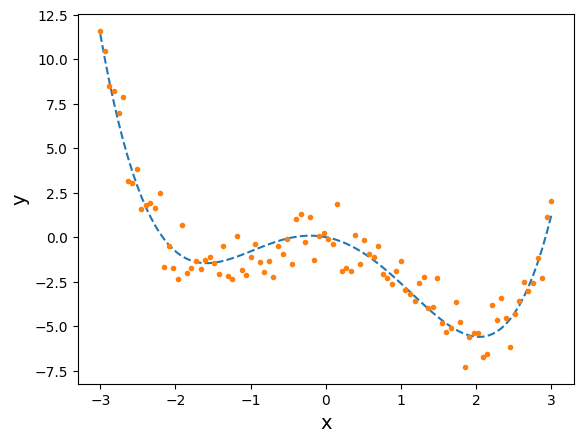

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

np.random.seed(1358)
x = np.linspace(-3,3, 100)
y_true = 0.3 * x**4 -0.1 * x**3 - 2* x**2 - 0.8*x
y = y_true + np.random.randn(len(x))
data_points = list(zip(x, y))

(print("The data set looks as follows:"))
plt.plot(x,y_true, '--')
plt.plot(x,y, '.')
plt.xlabel('x', size=14)
plt.ylabel('y', size=14)

Now, use the least squares method to find the parameters for the following models:

### _Model 1_


Linear Model Coefficients: a1 = -1.31745895844509 , a0 = -1.06551758405773


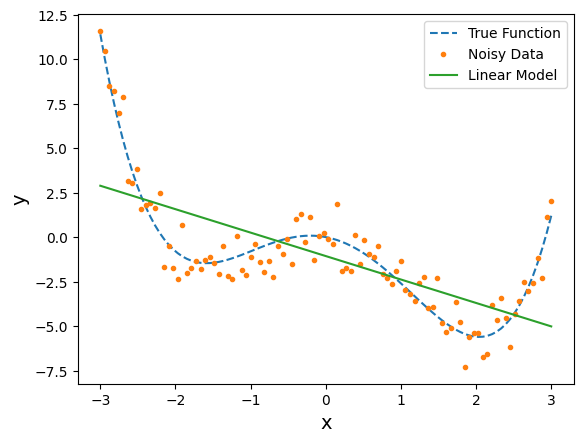

In [17]:
# Provided data for the test set
np.random.seed(1358)
x_test = np.linspace(-3, 3, 100)
y_true_test = 0.3 * x_test**4 - 0.1 * x_test**3 - 2 * x_test**2 - 0.8 * x_test
y_test = y_true_test + np.random.randn(len(x_test))
data_points_test = list(zip(x_test, y_test))

# Variable for the linear equation
x_sym, a0, a1 = sp.symbols('x a0 a1')

# Define the linear model
linear_model = a1 * x_sym + a0

# Create a list of data points (x, y) for the least squares fitting
data_points_model = list(zip(x_test, y_test))

# Sum of squared differences between observed and predicted y-values for the linear model
error_model = sum((linear_model.subs(x_sym, xi) - yi)**2 for xi, yi in data_points_model)

# Finding partial derivatives of the error function with respect to coefficients
partial_a1_model, partial_a0_model = sp.diff(error_model, a1), sp.diff(error_model, a0)

# Solving the system of equations to minimize the error (least squares solution) for the linear model
solution_model = sp.solve((partial_a1_model, partial_a0_model), (a1, a0))

# Extracting the coefficients from the solutions
coefficients_linear_model = solution_model[a1], solution_model[a0]

# Display the coefficients with variable names
print("\nLinear Model Coefficients: a1 =", coefficients_linear_model[0], ", a0 =", coefficients_linear_model[1])

# Plotting the results
plt.figure()
plt.plot(x_test, y_true_test, '--', label='True Function')
plt.plot(x_test, y_test, '.', label='Noisy Data')
plt.plot(x_test, np.polyval(coefficients_linear_model, x_test), label='Linear Model')
plt.xlabel('x', size=14)
plt.ylabel('y', size=14)
plt.legend()
plt.show()

### _Model 2_

Quadratic Model Coefficients: a2 = 0.410513483953173 , a1 = -1.31745895844509 , a0 = -2.32193764100532


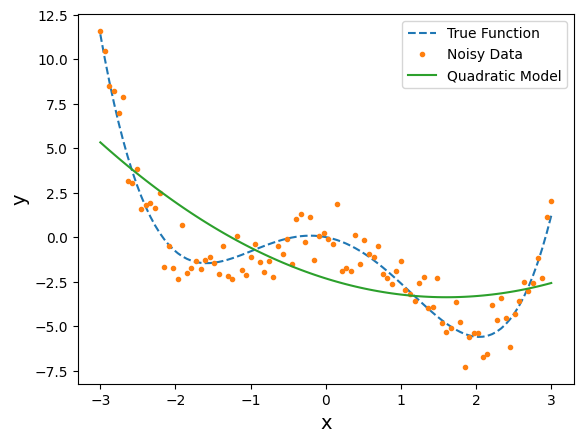

In [18]:
# Provided data for the test set
np.random.seed(1358)
x_test = np.linspace(-3, 3, 100)
y_true_test = 0.3 * x_test**4 - 0.1 * x_test**3 - 2 * x_test**2 - 0.8 * x_test
y_test = y_true_test + np.random.randn(len(x_test))
data_points_test = list(zip(x_test, y_test))

# Create symbolic variables for the quadratic equation
x_sym, a0, a1, a2 = sp.symbols('x a0 a1 a2')

# Define the quadratic model
quadratic_model = a2 * x_sym**2 + a1 * x_sym + a0

# Create a list of data points (x, y) for the least squares fitting
data_points_model = list(zip(x_test, y_test))

# Sum of squared differences between observed and predicted y-values for the quadratic model
error_model = sum((quadratic_model.subs(x_sym, xi) - yi)**2 for xi, yi in data_points_model)

# Finding partial derivatives of the error function with respect to coefficients
partial_a2_model, partial_a1_model, partial_a0_model = sp.diff(error_model, a2), sp.diff(error_model, a1), sp.diff(error_model, a0)

# Solving the system of equations to minimize the error (least squares solution) for the quadratic model
solution_model = sp.solve((partial_a2_model, partial_a1_model, partial_a0_model), (a2, a1, a0))

# Extracting the coefficients from the solutions
coefficients_quadratic_model = solution_model[a2], solution_model[a1], solution_model[a0]

# Display the coefficients with variable names
print("Quadratic Model Coefficients:", 
      "a2 =", coefficients_quadratic_model[0],
      ", a1 =", coefficients_quadratic_model[1],
      ", a0 =", coefficients_quadratic_model[2])

# Plotting the results
plt.plot(x_test, y_true_test, '--', label='True Function')
plt.plot(x_test, y_test, '.', label='Noisy Data')
plt.plot(x_test, np.polyval(coefficients_quadratic_model, x_test), label='Quadratic Model')
plt.xlabel('x', size=14)
plt.ylabel('y', size=14)
plt.legend()
plt.show()

### _Model 3_

Cubic Model Coefficients: a3 = -0.144440966027100 , a2 = 0.410513483953173 , a1 = -0.521826654670835 , a0 = -2.32193764100532


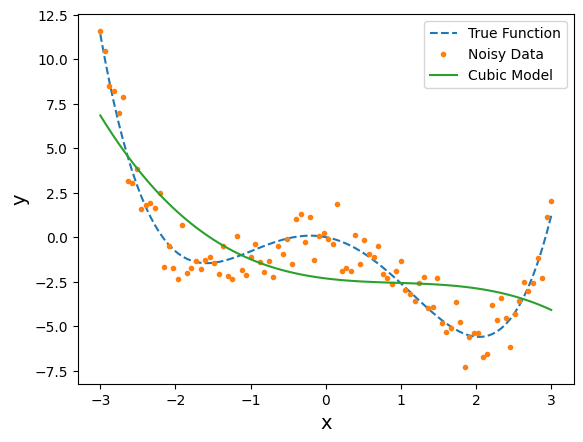

In [19]:
# Provided data for the test set
np.random.seed(1358)
x_test = np.linspace(-3, 3, 100)
y_true_test = 0.3 * x_test**4 - 0.1 * x_test**3 - 2 * x_test**2 - 0.8 * x_test
y_test = y_true_test + np.random.randn(len(x_test))
data_points_test = list(zip(x_test, y_test))

# Create symbolic variables for the cubic equation
x_sym, a0, a1, a2, a3 = sp.symbols('x a0 a1 a2 a3')

# Define the cubic model
cubic_model = a3 * x_sym**3 + a2 * x_sym**2 + a1 * x_sym + a0

# Create a list of data points (x, y) for the least squares fitting
data_points_model = list(zip(x_test, y_test))

# Sum of squared differences between observed and predicted y-values for the cubic model
error_model = sum((cubic_model.subs(x_sym, xi) - yi)**2 for xi, yi in data_points_model)

# Finding partial derivatives of the error function with respect to coefficients
partial_a3_model, partial_a2_model, partial_a1_model, partial_a0_model = sp.diff(error_model, a3), sp.diff(error_model, a2), sp.diff(error_model, a1), sp.diff(error_model, a0)

# Solving the system of equations to minimize the error (least squares solution) for the cubic model
solution_model = sp.solve((partial_a3_model, partial_a2_model, partial_a1_model, partial_a0_model), (a3, a2, a1, a0))

# Extracting the coefficients from the solutions
coefficients_cubic_model = solution_model[a3], solution_model[a2], solution_model[a1], solution_model[a0]

# Display the coefficients with variable names
print("Cubic Model Coefficients:", 
      "a3 =", coefficients_cubic_model[0],
      ", a2 =", coefficients_cubic_model[1],
      ", a1 =", coefficients_cubic_model[2],
      ", a0 =", coefficients_cubic_model[3])

# Plotting the results
plt.plot(x_test, y_true_test, '--', label='True Function')
plt.plot(x_test, y_test, '.', label='Noisy Data')
plt.plot(x_test, np.polyval(coefficients_cubic_model, x_test), label='Cubic Model')
plt.xlabel('x', size=14)
plt.ylabel('y', size=14)
plt.legend()
plt.show()

### _Model 4_

Quartic Model Coefficients: a4 = 0.295887429304493 , a3 = -0.144440966027100 , a2 = -1.91738270981669 , a1 = -0.521826654670834 , a0 = -0.185503581942679


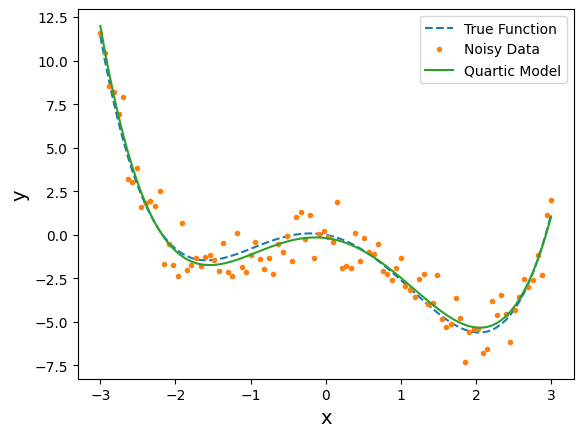

In [20]:
# Provided data for the test set
np.random.seed(1358)
x_test = np.linspace(-3, 3, 100)
y_true_test = 0.3 * x_test**4 - 0.1 * x_test**3 - 2 * x_test**2 - 0.8 * x_test
y_test = y_true_test + np.random.randn(len(x_test))
data_points_test = list(zip(x_test, y_test))

# Create symbolic variables for the quartic equation
x_sym, a0, a1, a2, a3, a4 = sp.symbols('x a0 a1 a2 a3 a4')

# Define the quartic model
quartic_model = a4 * x_sym**4 + a3 * x_sym**3 + a2 * x_sym**2 + a1 * x_sym + a0

# Create a list of data points (x, y) for the least squares fitting
data_points_model = list(zip(x_test, y_test))

# Sum of squared differences between observed and predicted y-values for the quartic model
error_model = sum((quartic_model.subs(x_sym, xi) - yi)**2 for xi, yi in data_points_model)

# Finding partial derivatives of the error function with respect to coefficients
partial_a4_model, partial_a3_model, partial_a2_model, partial_a1_model, partial_a0_model = sp.diff(error_model, a4), sp.diff(error_model, a3), sp.diff(error_model, a2), sp.diff(error_model, a1), sp.diff(error_model, a0)

# Solving the system of equations to minimize the error (least squares solution) for the quartic model
solution_model = sp.solve((partial_a4_model, partial_a3_model, partial_a2_model, partial_a1_model, partial_a0_model), (a4, a3, a2, a1, a0))

# Extracting the coefficients from the solutions
coefficients_quartic_model = solution_model[a4], solution_model[a3], solution_model[a2], solution_model[a1], solution_model[a0]

# Display the coefficients with variable names
print("Quartic Model Coefficients:", 
      "a4 =", coefficients_quartic_model[0],
      ", a3 =", coefficients_quartic_model[1],
      ", a2 =", coefficients_quartic_model[2],
      ", a1 =", coefficients_quartic_model[3],
      ", a0 =", coefficients_quartic_model[4])

# Plotting the results
plt.plot(x_test, y_true_test, '--', label='True Function')
plt.plot(x_test, y_test, '.', label='Noisy Data')
plt.plot(x_test, np.polyval(coefficients_quartic_model, x_test), label='Quartic Model')
plt.xlabel('x', size=14)
plt.ylabel('y', size=14)
plt.legend()
plt.show()

### _Model 5_

Quintic Model Coefficients: a5 = 0.0127947770141101 , a4 = 0.295887429304492 , a3 = -0.274895212228509 , a2 = -1.91738270981668 , a1 = -0.265342015553682 , a0 = -0.185503581942680


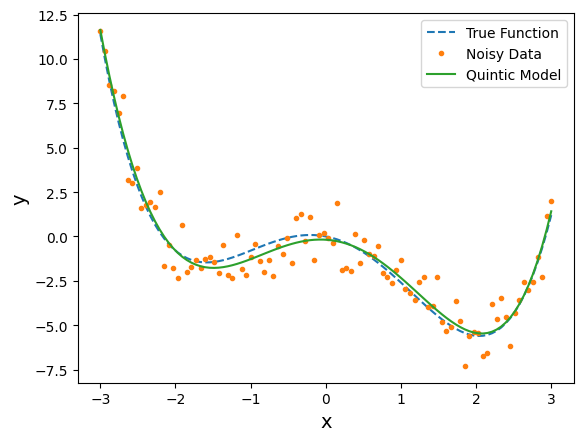

In [21]:
# Provided data for the test set
np.random.seed(1358)
x_test = np.linspace(-3, 3, 100)
y_true_test = 0.3 * x_test**4 - 0.1 * x_test**3 - 2 * x_test**2 - 0.8 * x_test
y_test = y_true_test + np.random.randn(len(x_test))
data_points_test = list(zip(x_test, y_test))

# Create symbolic variables for the quintic equation
x_sym, a0, a1, a2, a3, a4, a5 = sp.symbols('x a0 a1 a2 a3 a4 a5')

# Define the quintic model
quintic_model = a5 * x_sym**5 + a4 * x_sym**4 + a3 * x_sym**3 + a2 * x_sym**2 + a1 * x_sym + a0

# Create a list of data points (x, y) for the least squares fitting
data_points_model = list(zip(x_test, y_test))

# Sum of squared differences between observed and predicted y-values for the quintic model
error_model = sum((quintic_model.subs(x_sym, xi) - yi)**2 for xi, yi in data_points_model)

# Finding partial derivatives of the error function with respect to coefficients
partial_a5_model, partial_a4_model, partial_a3_model, partial_a2_model, partial_a1_model, partial_a0_model = sp.diff(error_model, a5), sp.diff(error_model, a4), sp.diff(error_model, a3), sp.diff(error_model, a2), sp.diff(error_model, a1), sp.diff(error_model, a0)

# Solving the system of equations to minimize the error (least squares solution) for the quintic model
solution_model = sp.solve((partial_a5_model, partial_a4_model, partial_a3_model, partial_a2_model, partial_a1_model, partial_a0_model), (a5, a4, a3, a2, a1, a0))

# Extracting the coefficients from the solutions
coefficients_quintic_model = solution_model[a5], solution_model[a4], solution_model[a3], solution_model[a2], solution_model[a1], solution_model[a0]

# Display the coefficients with variable names
print("Quintic Model Coefficients:", 
      "a5 =", coefficients_quintic_model[0],
      ", a4 =", coefficients_quintic_model[1],
      ", a3 =", coefficients_quintic_model[2],
      ", a2 =", coefficients_quintic_model[3],
      ", a1 =", coefficients_quintic_model[4],
      ", a0 =", coefficients_quintic_model[5])

# Plotting the results
plt.plot(x_test, y_true_test, '--', label='True Function')
plt.plot(x_test, y_test, '.', label='Noisy Data')
plt.plot(x_test, np.polyval(coefficients_quintic_model, x_test), label='Quintic Model')
plt.xlabel('x', size=14)
plt.ylabel('y', size=14)
plt.legend()
plt.show()

### Comparing the models

I created a function to calculate each individual r-squared value for the models. Then I displayed them against the original dataset.

1 Model Coefficients: a0 = -1.06551758405773, a1 = -1.31745895844509
R-squared for Degree-1 Model: 0.534749056152279

2 Model Coefficients: a0 = -2.32193764100532, a1 = -1.31745895844509, a2 = 0.410513483953173
R-squared for Degree-2 Model: 0.626087393135000

3 Model Coefficients: a0 = -2.32193764100532, a1 = -0.521826654670835, a2 = 0.410513483953173, a3 = -0.144440966027100
R-squared for Degree-3 Model: 0.639676103650223

4 Model Coefficients: a0 = -0.185503581942679, a1 = -0.521826654670834, a2 = -1.91738270981669, a3 = -0.144440966027100, a4 = 0.295887429304493
R-squared for Degree-4 Model: 0.994448800571093

5 Model Coefficients: a0 = -0.185503581942680, a1 = -0.265342015553682, a2 = -1.91738270981668, a3 = -0.274895212228509, a4 = 0.295887429304492, a5 = 0.0127947770141101
R-squared for Degree-5 Model: 0.992955852905782



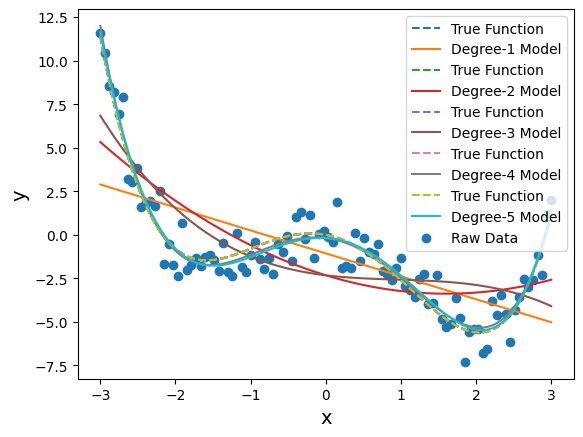

In [24]:
def calculate_r_squared(y_true, y_predicted):
    y_mean = np.mean(y_true)
    total_sum_of_squares = np.sum((y_true - y_mean)**2)
    residual_sum_of_squares = np.sum((y_true - y_predicted)**2)
    r_squared = 1 - (residual_sum_of_squares / total_sum_of_squares)
    return r_squared

def fit_and_compare_models(data_points, x_values, y_true_values, degree_max=5):
    r_squared_values = []

    for degree in range(1, degree_max + 1):
        # Create symbolic variables
        symbols = sp.symbols(' '.join(f'a{i}' for i in range(degree + 1)))

        # Define the polynomial model
        polynomial_model = sum(s * x_sym**i for i, s in enumerate(symbols))

        # Sum of squared differences between observed and predicted y-values for the polynomial model
        error_model = sum((polynomial_model.subs(x_sym, xi) - yi)**2 for xi, yi in data_points)

        # Finding partial derivatives of the error function with respect to coefficients
        partials = [sp.diff(error_model, symbol) for symbol in symbols]

        # Solving the system of equations to minimize the error (least squares solution) for the polynomial model
        solution_model = sp.solve(partials, symbols)

        # Extracting the coefficients from the solutions
        coefficients_model = [solution_model[s] for s in symbols]

        # Calculate R-squared
        y_predicted = np.polyval(coefficients_model[::-1], x_values)
        r_squared = calculate_r_squared(y_true_values, y_predicted)
        r_squared_values.append(r_squared)

        # Display the coefficients with variable names
        print(f"{degree} Model Coefficients: {', '.join(f'a{i} = {coeff}' for i, coeff in enumerate(coefficients_model))}")
        print(f"R-squared for Degree-{degree} Model: {r_squared}\n")

        # Plotting the results
        plt.plot(x_values, y_true_values, '--', label='True Function')
        plt.plot(x_values, np.polyval(coefficients_model[::-1], x_values), label=f'Degree-{degree} Model')

    # Visualize the fits
    plt.scatter(*zip(*data_points), label='Raw Data')
    plt.xlabel('x', size=14)
    plt.ylabel('y', size=14)
    plt.legend()
    plt.show()

    return r_squared_values


# Usage
degree_max = 5
data_points_test = list(zip(x_test, y_test))
x_sym = sp.symbols('x')

r_squared_values = fit_and_compare_models(data_points_test, x_test, y_true_test, degree_max)

### _Task 3_

In [ ]:
# 1 
# Define the variable 
x = symbols('x')

# Define the function
y = x**2 + 2 * x + 1

# Calculate the derivative
der_f = diff(y, x)

der_f

2*x + 2

In [ ]:
# 2 
# Define the variable 
x = symbols('x')

# Define the function
y = (3*x - 5)**3

# Calculate the derivative
der_f = diff(y, x)

der_f

9*(3*x - 5)**2

In [ ]:
# 3 
# Define the variable 
x = symbols('x')

# Define the function
y = ((sqrt(x) -  1)**2) - ((x**2 + 1)**4)

# Calculate the derivative
der_f = diff(y, x)

der_f

-8*x*(x**2 + 1)**3 + (sqrt(x) - 1)/sqrt(x)

In [ ]:
# 4 
# Define the variable 
x = symbols('x')

# Define the function
y = 7*cot(x) - 8*(cos(x)**(-1))

# Calculate the derivative
der_f = diff(y, x)

der_f

-8*sin(x)/cos(x)**2 - 7*cot(x)**2 - 7

In [ ]:
# 5 
# Define the variable 
x = symbols('x')

# Define the function
y = x - ln(x) +7

# Calculate the derivative
der_f = diff(y, x)

der_f

1 - 1/x

In [ ]:
# 6 
# Define the variable 
x = symbols('x')

# Define the function
y = -10 * (E)**x + 5**x - 5*x + (x/5)

# Calculate the derivative
der_f = diff(y, x)

der_f

5**x*log(5) - 10*exp(x) - 24/5

In [ ]:
# 7 
# Define the variable 
x = symbols('x')

# Define the function
y = (2*sin(x))/(sin(x) - cos(x))

# Calculate the derivative
der_f = diff(y, x)

der_f

2*(-sin(x) - cos(x))*sin(x)/(sin(x) - cos(x))**2 + 2*cos(x)/(sin(x) - cos(x))

In [ ]:
# 8 
# Define the variable 
x = symbols('x')

# Define the function
y = ((x**2)*ln(x))/(1 - (tan(x))**(-1))

# Calculate the derivative
der_f = diff(y, x)

der_f

x**2*(-tan(x)**2 - 1)*log(x)/((1 - 1/tan(x))**2*tan(x)**2) + 2*x*log(x)/(1 - 1/tan(x)) + x/(1 - 1/tan(x))

### _Task 4_

In [ ]:
# 1
# Define the function
f = (x - 2)/(x**2 + 2*x +1)

# calculate the limit as x approaches 2
lim_result = limit(f, x, 2)
lim_result

0

In [ ]:
# 2
# Define the function
f = (x**3 + 3*(x**2) + 5)/ (x**2 - x - 6)

# calculate the limit as x approaches -2
lim_result = limit(f, x, -2)
lim_result

-oo

In [ ]:
# 3
# Define the function
f = ((sqrt(x**2 + 1) + x)**2)/ (root(x**6 + 1, 3))

# calculate the limit as x approaches plus infinite
lim_result = limit(f, x, oo)
lim_result

4

In [ ]:
# 4
# Define the function
f = (sin(10*x))/10*x

# calculate the limit as x approaches 0
lim_result = limit(f, x, 0)
lim_result

0

In [ ]:
# 5
# Define the function
f = x/(sqrt(1 - cos(x)))

# calculate the limit as x approaches 0
lim_result = limit(f, x, 0)
lim_result

sqrt(2)

### _Task 5_

In [ ]:
# 1
# Define the variable and the function
x = symbols('x')
f = sin(x)

# Compute the terms of the Taylor series
taylor_series = f.series(x, 0, 5).removeO()

# Display the terms of the Taylor series
print(taylor_series)

-x**3/6 + x


In [ ]:
# 2
# Define the variable and the function
x = symbols('x')
f = E**(3*x)

# Compute the terms of the Taylor series
taylor_series = f.series(x, 0, 5).removeO()

# Display the terms of the Taylor series
print(taylor_series)

27*x**4/8 + 9*x**3/2 + 9*x**2/2 + 3*x + 1


In [ ]:
# 3
# Define the variable and the function
x = symbols('x')
f = ln(x)

# Compute the terms of the Taylor series
taylor_series = f.series(x, 1, 5).removeO()

# Display the terms of the Taylor series
print(taylor_series)

x - (x - 1)**4/4 + (x - 1)**3/3 - (x - 1)**2/2 - 1


In [ ]:
# 4
# Define the variable and the function
x = symbols('x')
f = tan(x)

# Compute the terms of the Taylor series
taylor_series = f.series(x, pi/4, 5).removeO()

# Display the terms of the Taylor series
print(taylor_series)

2*x + 10*(x - pi/4)**4/3 + 8*(x - pi/4)**3/3 + 2*(x - pi/4)**2 - pi/2 + 1
